# CartPole Gym environment with TfAgents

##### suppress package warnings, prepare matlab, if in colab: load additional packages for rendering

In [1]:
import sys
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    

In [2]:
# only for local installation
sys.path.append('..')

## Install packages (gym, tfagents, tensorflow,....)

In [ ]:
!pip install easyagents >/dev/null

## Dry Run (very short training)

In [1]:
from easyagents.agents import DqnAgent
from easyagents.callbacks import log, plot, duration

c:\dev\github\easyagents\env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
W0909 22:29:25.107722  8752 __init__.py:689] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


Let's do a quick test and train for a few iterations using a default network architecture (2 layers, fully connected, 100 neurons each):

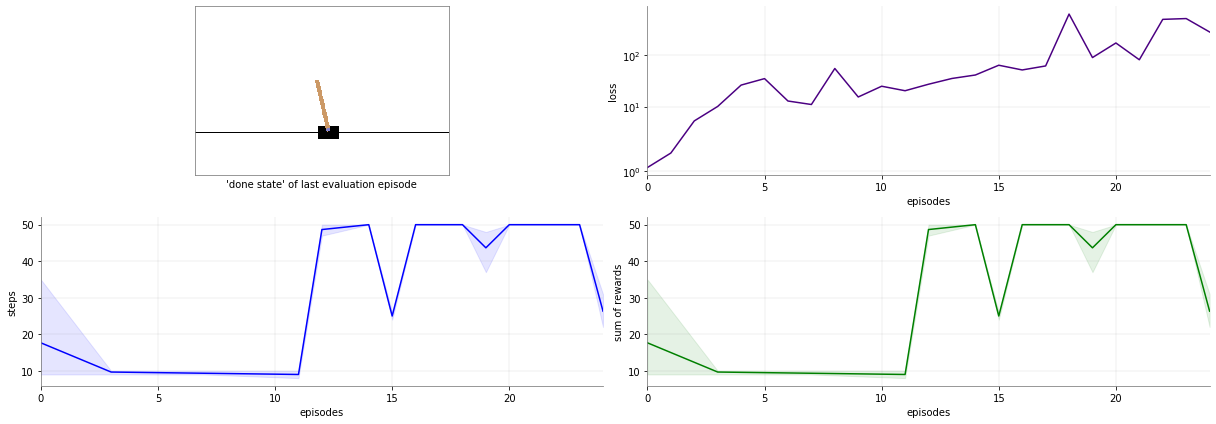

In [4]:
dqnAgent = DqnAgent('CartPole-v0')
dqnAgent.train([duration.Fast(), plot.State()])

Note that rewards and step count are equal. That's because the CartPole environment doles out 1 reward point for 
each successful step, and stops after the first failed step.

'duration.Fast()' configures the training length to 10 iterations with 10 episodes each. 
After every iteration the current policy is retrained. The resulting loss is depicted in the first plot.
Since Ppo is an actor-critic algorithm we not only plot the total loss but also the loss for the actor- and
critic-networks separately.

'duration.Fast()' also configures the policy evaluation to 5 episodes every 3 iterations.
In the "steps" and "sum of rewards" plots we see the result of the evaluation.
The coloured area represents the max and min values encoutered for the current evaluation period.

## Train (plot state, custom network)

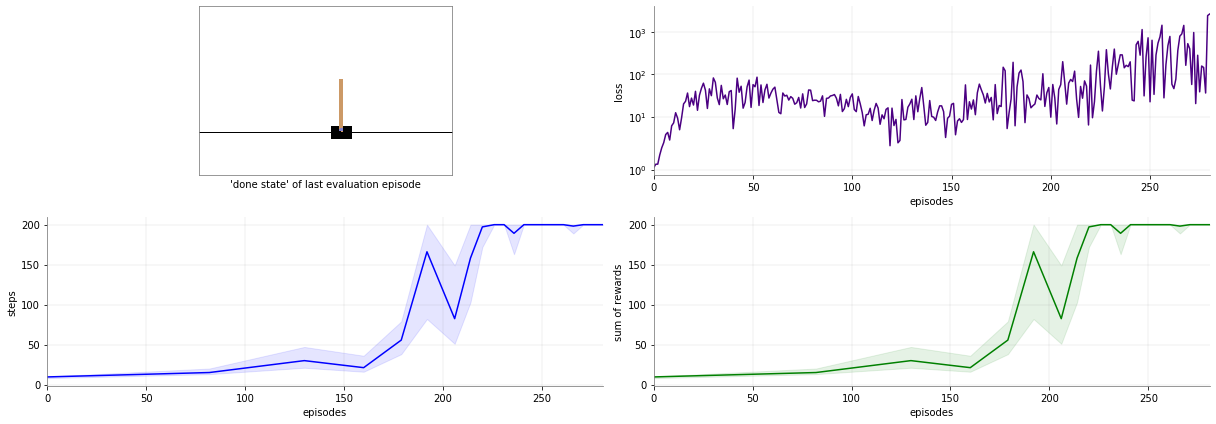

Wall time: 3min 50s


In [5]:
%%time

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State()], num_iterations=20000)


The fc_layers argument defines the policy's neural network architecture. Here we use 3 fully connected layers
with 100 neurons in the first, 50 in the second and 25 in the final layer. 
By default fc_layers=(75,75) is used.

The first argument of the train method is a list of callbacks. By default the callbacks producing the loss, sum-of-rewards and steps plot are automatically added ([log.Loss(), log.Rewards(), log.Steps()]). By passing 'log.State()' we added another plot. The state plot depicts the last observation state of last evaluation episode.

Besides num_iterations there are quite a few parameters to sepcifiy the exact training duration (eg num_episodes_per_iteration, num_epochs_per_iteration, max_steps_per_episode,...)

## Next: Custom training (playing, mp4, logging)

* see [Orso on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/easyagents_orso.ipynb)
  (an example of a gym environment implementation based on a routing problem)

